In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,9)})


In [52]:
df = pd.read_csv(r'cs-training.csv')
df = df.dropna()
df.drop(df[['Unnamed: 0']],axis=1,inplace=True)

df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


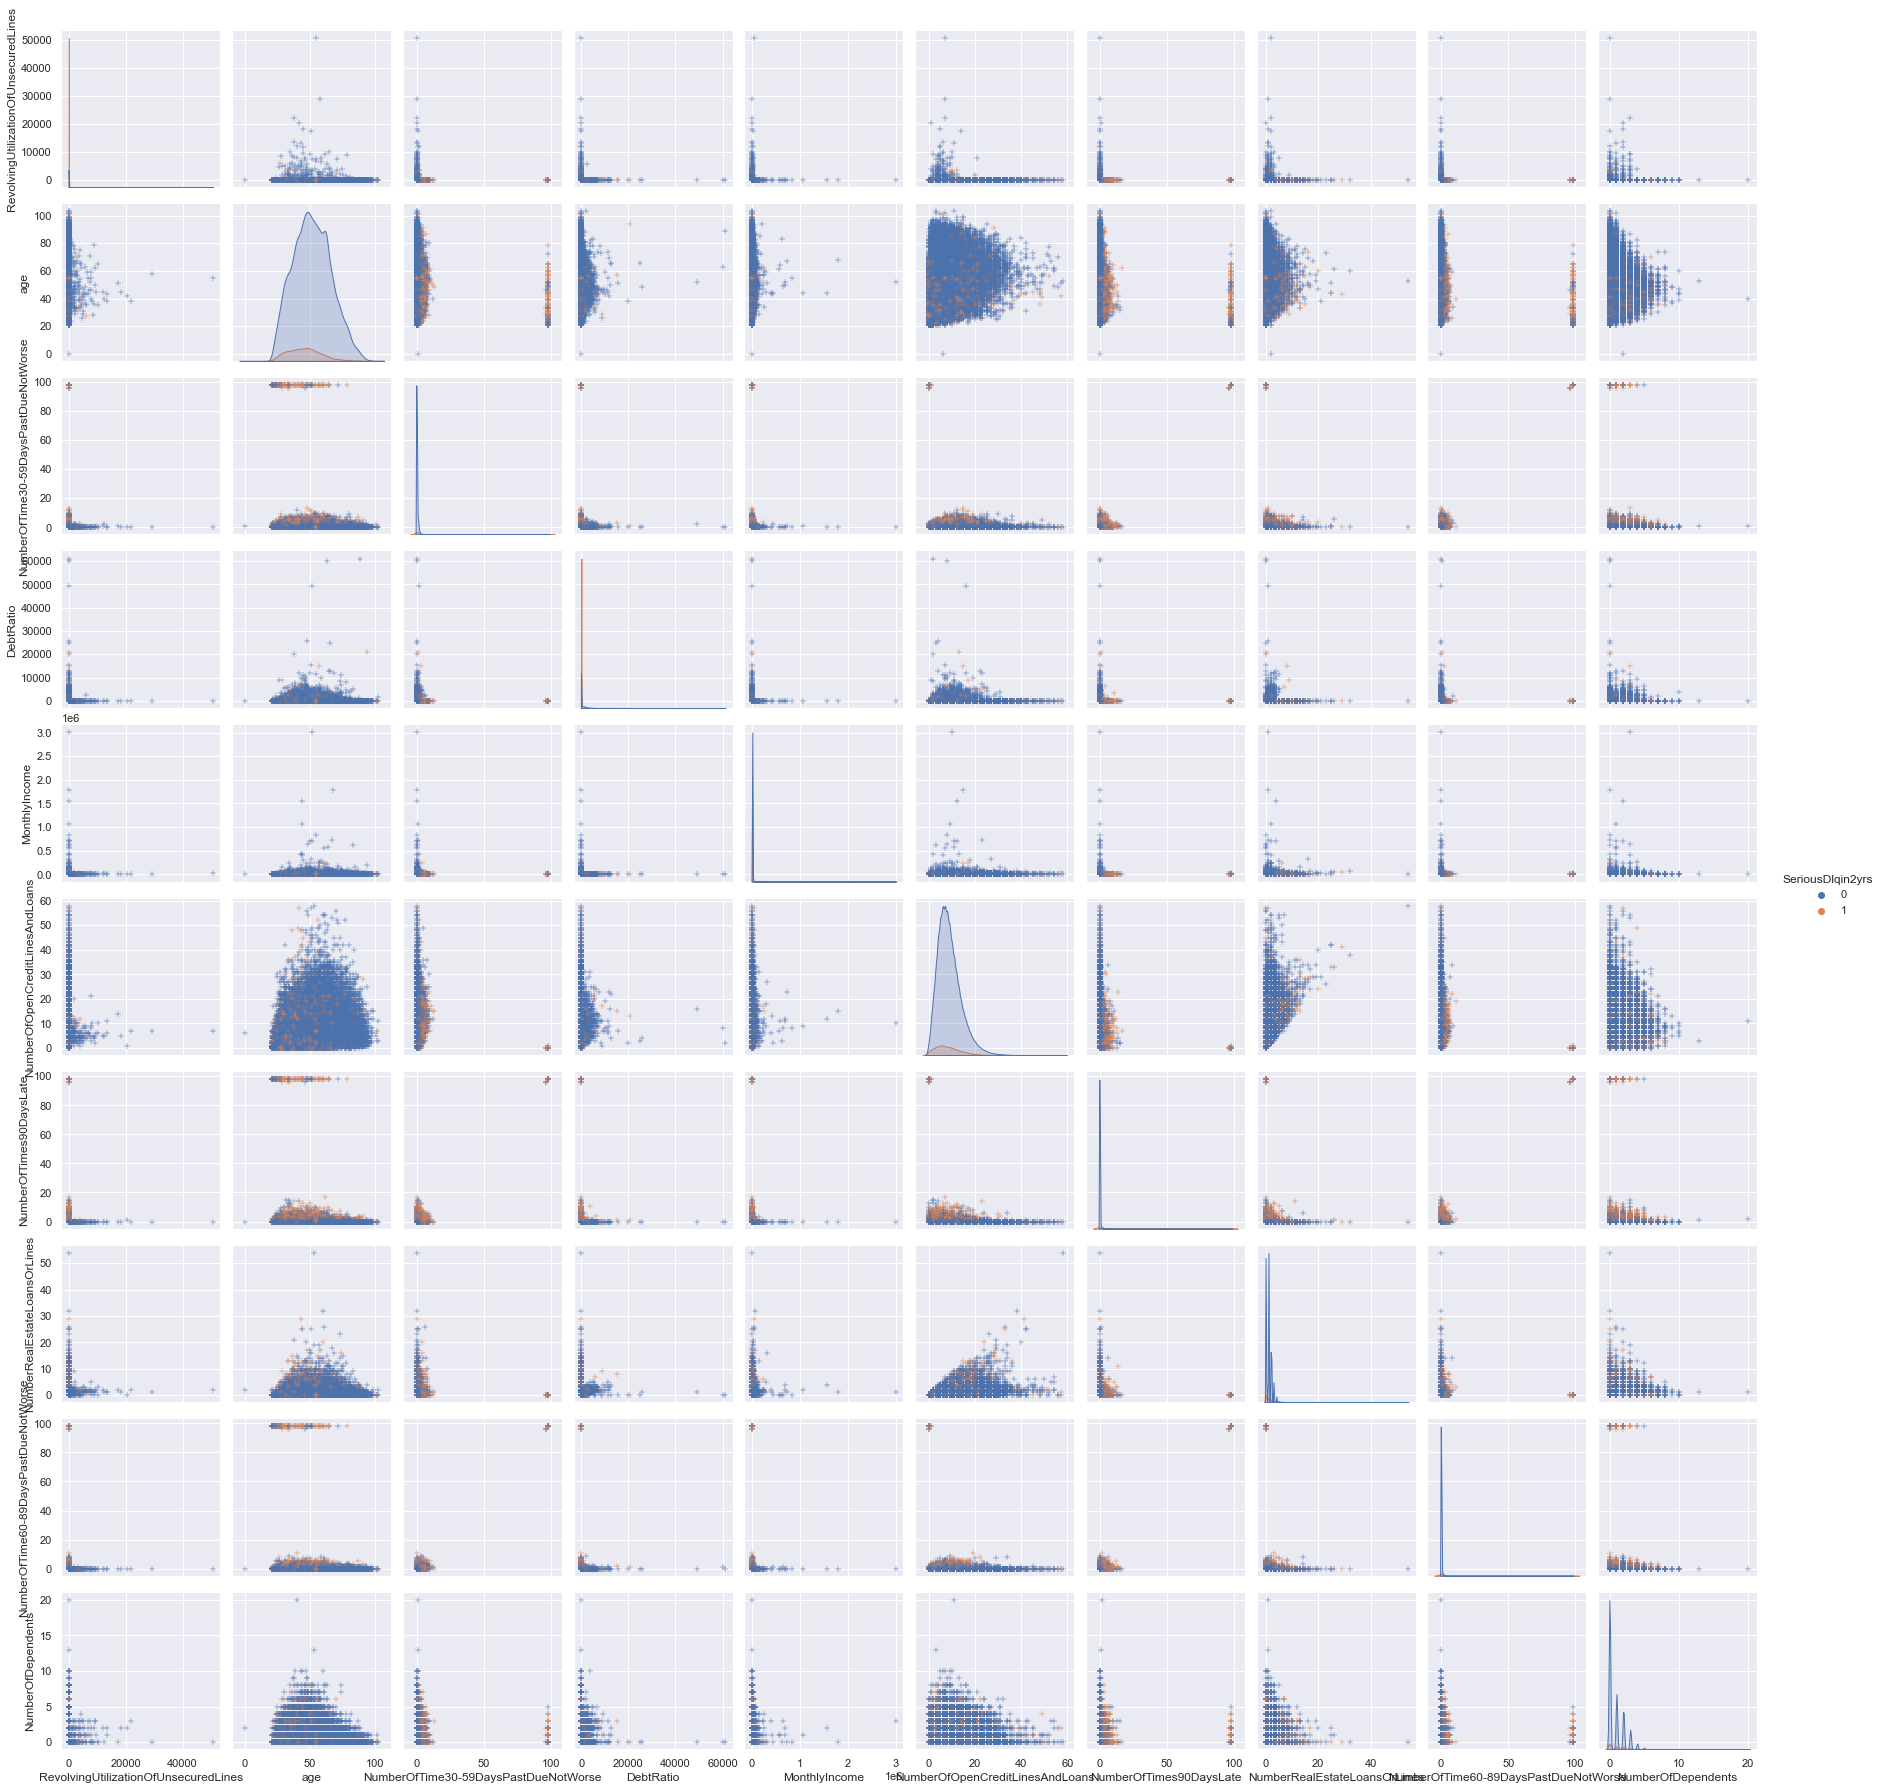

In [53]:
g = sns.pairplot(df, hue='SeriousDlqin2yrs', markers='+')

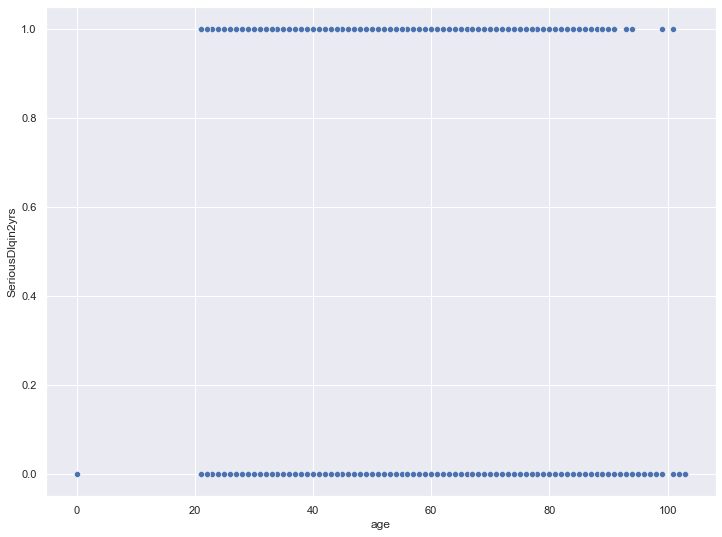

In [54]:
graph = sns.scatterplot(x = 'age' , y='SeriousDlqin2yrs' , data=df)


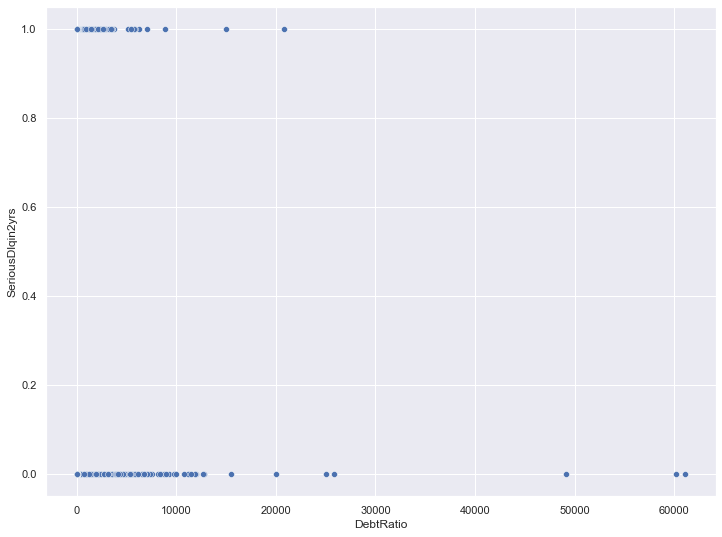

In [55]:
graph = sns.scatterplot(x = 'DebtRatio' , y='SeriousDlqin2yrs' , data=df)


### People with High Debt Ratio can easily return loans


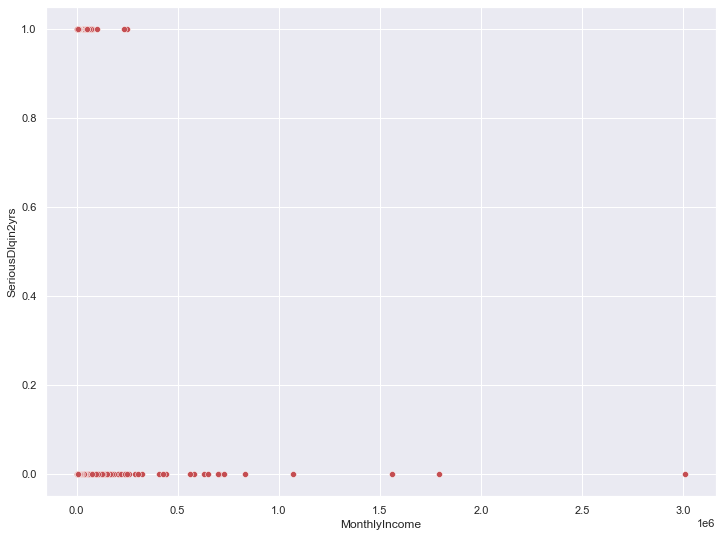

In [56]:
graph = sns.scatterplot(x = 'MonthlyIncome' , y='SeriousDlqin2yrs' , data=df , color="r")

## People with High monthly income can easily return loan


In [57]:
# graph = sns.scatterplot(x = 'NumberOfTime60-89DaysPastDueNotWorse' , y='SeriousDlqin2yrs' , data=df)


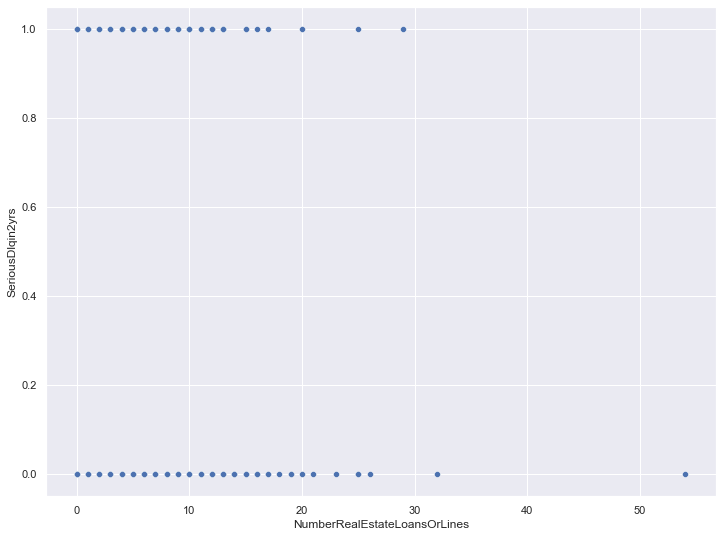

In [58]:
## People with more Real Estate (Big Loans) have high probabilty of returning back loans 

graph = sns.scatterplot(x = 'NumberRealEstateLoansOrLines' , y='SeriousDlqin2yrs' , data=df , marker ="o")


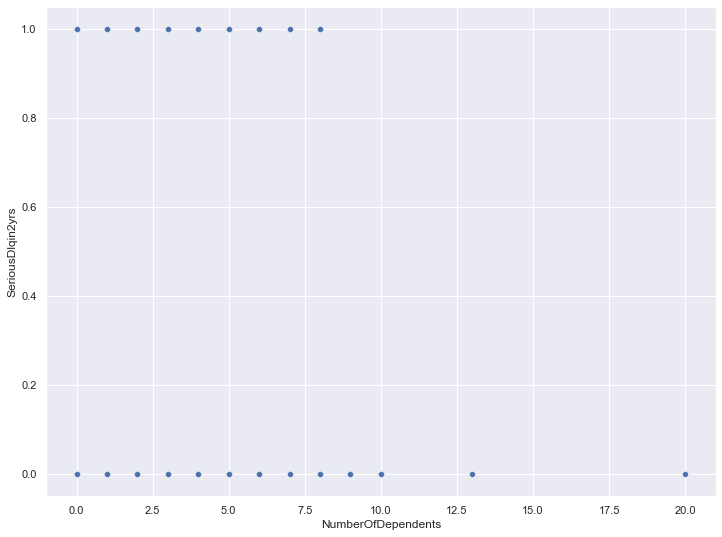

In [59]:
graph = sns.scatterplot(x = 'NumberOfDependents' , y='SeriousDlqin2yrs' , data=df)

## People with more dependents have high probabilty of returning back loans 



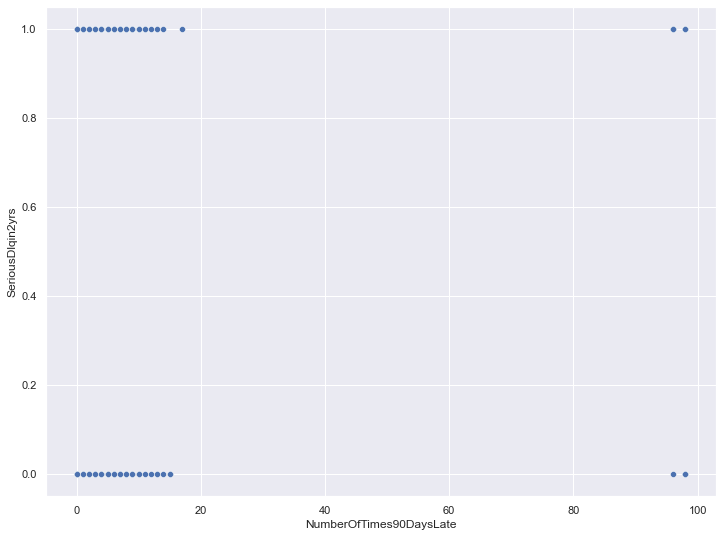

In [60]:
graph = sns.scatterplot(x = 'NumberOfTimes90DaysLate' , y='SeriousDlqin2yrs' , data=df)


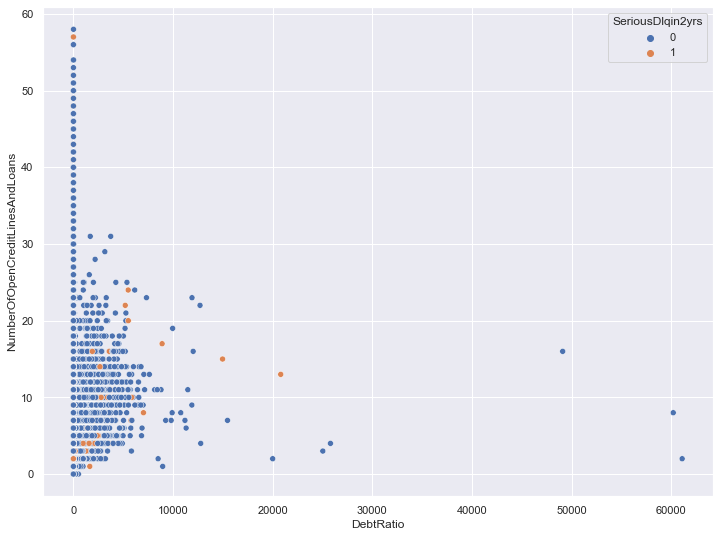

In [61]:
graph = sns.scatterplot(x = 'DebtRatio' , y='NumberOfOpenCreditLinesAndLoans' ,hue="SeriousDlqin2yrs" ,  data=df)

#### people with More credit lines and loans have low debt ratio (expected)
#### 


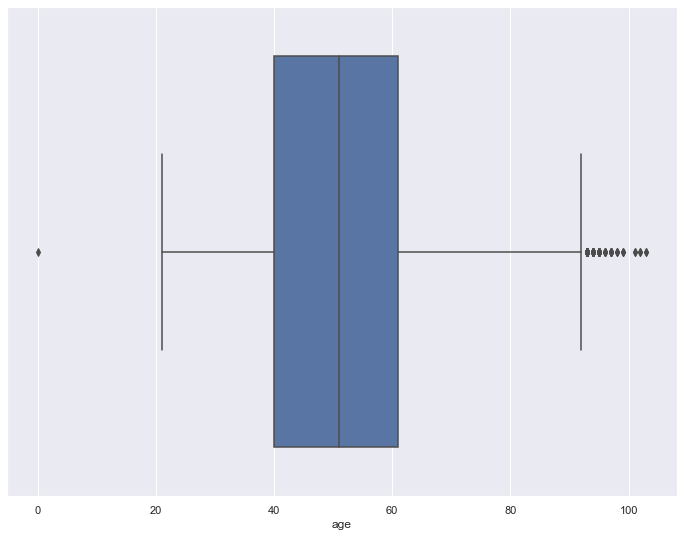

In [62]:
graph = sns.boxplot(x='age' , data = df)

## We can clearly see that data of people above the age of 90 is outlier

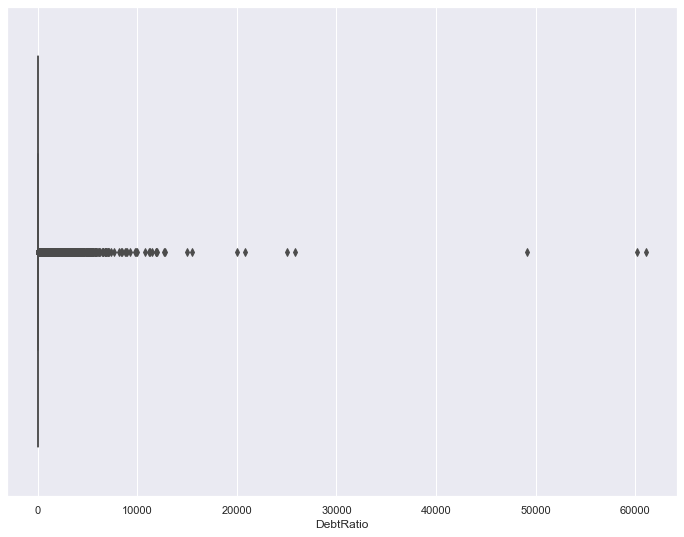

In [63]:
graph = sns.boxplot(x='DebtRatio' , data = df)

## we can clearly see that values greater than 0 are outliers

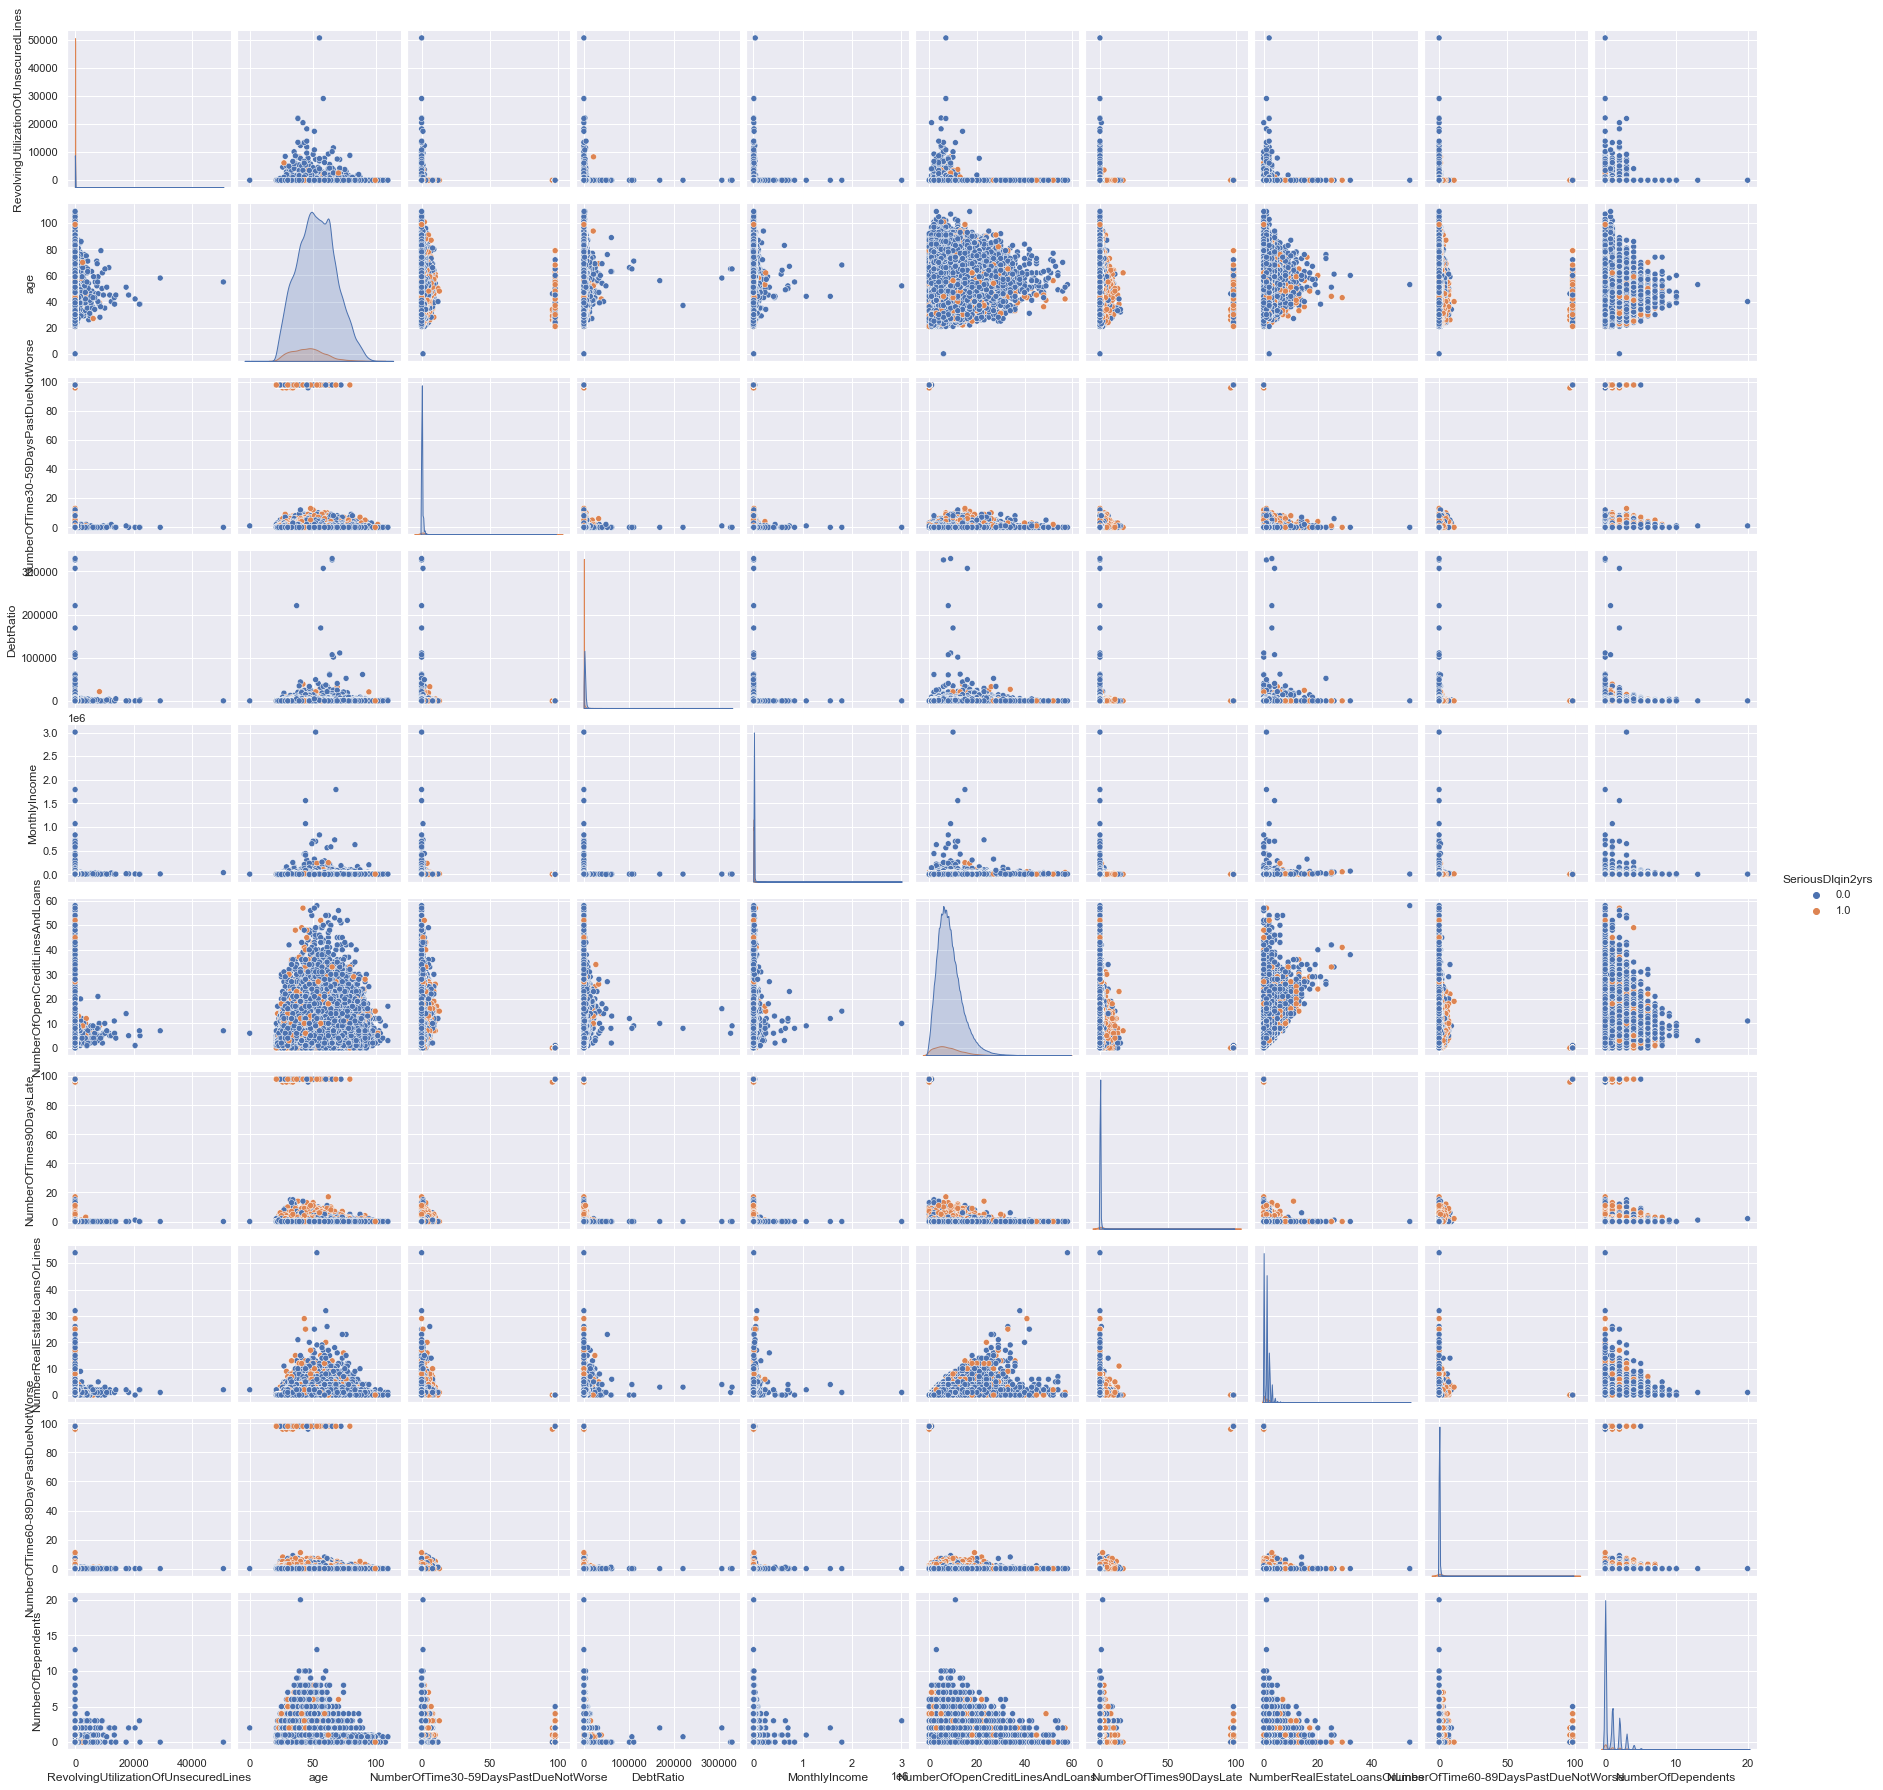

In [64]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data = pd.read_csv(r'cs-training.csv')
data = data.sample(frac = 1)
data = data.drop(data.iloc[:, 0:1],axis = 1)
trainingdata = imp_mean.fit_transform(data)
data = pd.DataFrame(trainingdata,columns = ["SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])
X_data_train = trainingdata[:,1:len(trainingdata)]
sc = StandardScaler()
X_data_train = sc.fit_transform(X_data_train)
Y_data_train = trainingdata[:,0]
sns.pairplot(data = data,hue = "SeriousDlqin2yrs")